Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking
gr(size=(600,300));

### snippet 4.1

No attempt has been made to condense this too fewer lines of code

In [2]:
noofsteps = 20;
noofwalks = 15;
pos = Array{Float64, 2}(rand(Uniform(-1, 1), noofsteps, noofwalks));
pos[1, :] = zeros(noofwalks);
csum = cumsum(pos, dims=1);

In [3]:
f = Plots.font("DejaVu Sans", 6)
mx = minimum(csum) * 0.9

-4.733503585732911

Plot and annotate the random walks

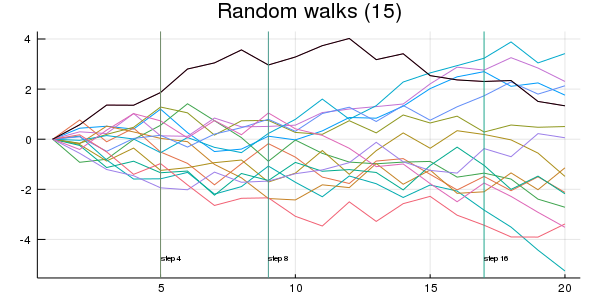

In [4]:
p1 = plot(csum, leg=false, title="Random walks ($(noofwalks))")
plot!(p1, csum[:, Int(floor(noofwalks/2))], leg=false, title="Random walks ($(noofwalks))", color=:black)
plot!(p1, [5], seriestype="vline")
annotate!(5, mx, text("step 4", f, :left))
plot!(p1, [9], seriestype="vline")
annotate!(9, mx, text("step 8", f, :left))
plot!(p1, [17], seriestype="vline")
annotate!(17, mx, text("step 16", f, :left))

Generate 3 plots of densities at 3 different step numbers (4, 8 and 16)

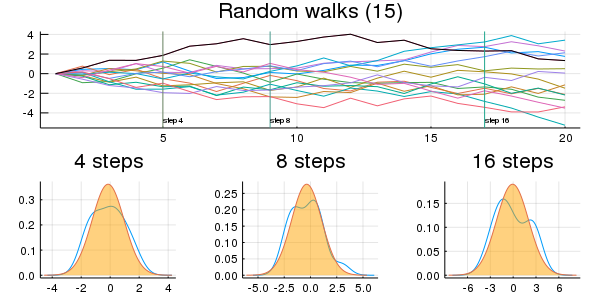

In [5]:
p2 = Vector{Plots.Plot{Plots.GRBackend}}(undef, 3);
plt = 1
for step in [4, 8, 16]
  indx = step + 1 # We aadded the first line of zeros
  global plt
  fit = fit_mle(Normal, csum[indx, :])
  x = (fit.μ-4*fit.σ):0.01:(fit.μ+4*fit.σ)
  p2[plt] = density(csum[indx, :], legend=false, title="$(step) steps")
  plot!( p2[plt], x, pdf.(Normal( fit.μ , fit.σ ) , x ), fill=(0, .5,:orange))
  plt += 1
end
p3 = plot(p2..., layout=(1, 3))
plot(p1, p3, layout=(2,1))

### snippet 4.2

In [6]:
prod(1 .+ rand(Uniform(0, 0.1), 10))

1.969741849293489

### snippet 4.3

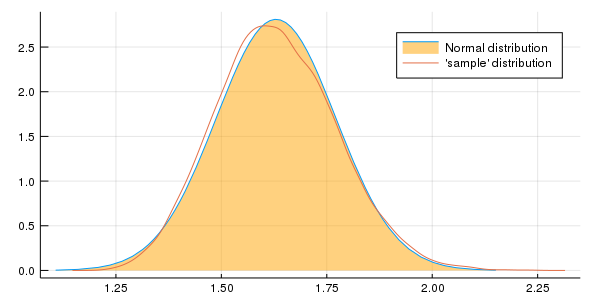

In [7]:
growth = [prod(1 .+ rand(Uniform(0, 0.1), 10)) for i in 1:10000];
fit = fit_mle(Normal, growth)
plot(Normal(fit.μ , fit.σ ), fill=(0, .5,:orange), lab="Normal distribution")
density!(growth, lab="'sample' distribution")

### snippet 4.4

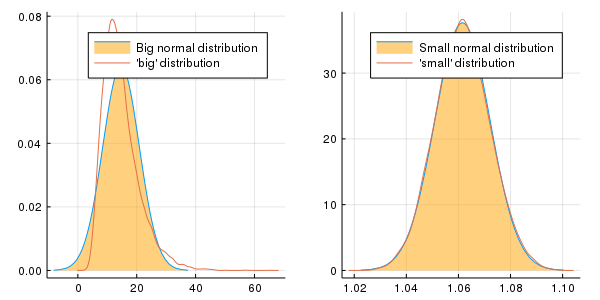

In [8]:
big = [prod(1 .+ rand(Uniform(0, 0.5), 12)) for i in 1:10000];
small = [prod(1 .+ rand(Uniform(0, 0.01), 12)) for i in 1:10000];
fitb = fit_mle(Normal, big)
fits = fit_mle(Normal, small)
p1 = plot(Normal(fitb.μ , fitb.σ ), lab="Big normal distribution", fill=(0, .5,:orange))
p2 = plot(Normal(fits.μ , fits.σ ), lab="Small normal distribution", fill=(0, .5,:orange))
density!(p1, big, lab="'big' distribution")
density!(p2, small, lab="'small' distribution")
plot(p1, p2, layout=(1, 2))

### snippet 4.5

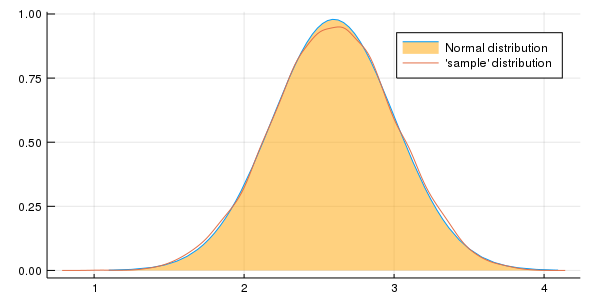

In [9]:
log_big = [log(prod(1 .+ rand(Uniform(0, 0.5), 12))) for i in 1:10000];
fit = fit_mle(Normal, log_big)
plot(Normal(fit.μ , fit.σ ), fill=(0, .5,:orange), lab="Normal distribution")
density!(log_big, lab="'sample' distribution")

### snippet 4.6

Grid of 1001 steps

In [10]:
p_grid = range(0, step=0.001, stop=1);

all priors = 1.0

In [11]:
prior = ones(length(p_grid));

Binomial pdf

In [12]:
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid];

As Uniform priar has been used, unstandardized posterior is equal to likelihood

In [13]:
posterior = likelihood .* prior;

Scale posterior such that they become probabilities

In [14]:
posterior = posterior / sum(posterior);

Sample using the computed posterior values as weights
In this example we keep the number of samples equal to the length of p_grid,
but that is not required.

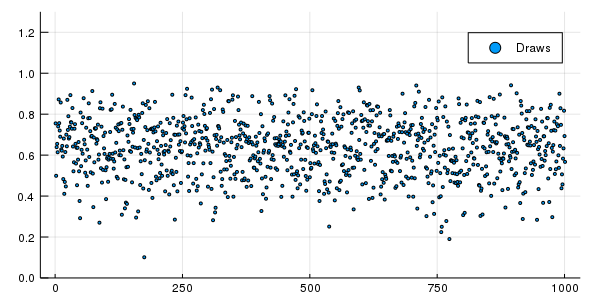

In [15]:
samples = sample(p_grid, Weights(posterior), length(p_grid));
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)
p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

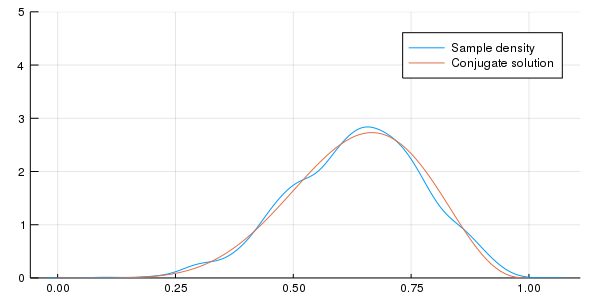

In [16]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
p[2] = plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

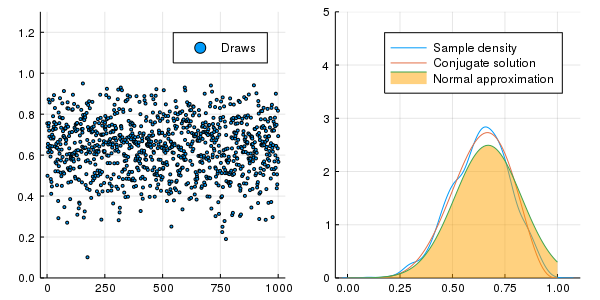

In [17]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation", fill=(0, .5,:orange))
plot(p..., layout=(1, 2))

End of `clip-01-06.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*